In [4]:
import numpy as np
import matplotlib.pyplot as plt
from hdg_postprocess.formats import load_from_file

# Introduction


In this demo the typical approach to get solution with HDG solver.
The idea is that one wants usually to solve plasma solutions in steady state with diffusion values $D, \mu, \chi_i, \chi_e$ less than 1 $m^2/s$ 


However, if passing from inputs file immediately low values of diffusion, the code will be unstable.

Therefore, we should start with high value of diffusion

For now we start from $D_0$=20 $m^2/s$


$D=\mu=\chi_i=\chi_e=D_0=20 m^2/s$


But we should not only start with high diffusion, we should also provide some inital guess, of the solution, from which the code will search for proper solution

First step is to solve several small timesteps (dt0=1e3 in adimensional values) like evolving simulation, so that the code can slowly proceed from constant solutions to more real ones

The typical settings in the param file for this case are:
* steady = .false.
* psdtime = .false.
* do not forget to specify you save_folder
* nrp = 3
* dumpnr_min
* dumpnr_max
* dt0 = 1e3
* nts = 10
* diff_n = diff_u = diff_e = diff_ee = 20.

we run the code with comand:
> ./MHDG-NGammaTiTeNeutral-serial-2D ./Meshes/CircLimAlign_Quads_Nel588_P6

## Initial guess

In [7]:
# name of the mesh without ending
meshbase = 'CircLimAlign_Quads_Nel588_P6'
meshpath = 'data/meshes/'
# number of partitions, since we are in serial equal to 1
n_partitions = 1
#solution path and name base
solpath = 'data/solutions/demo_circular_neutrals_only/time_init/'
# the initial solution from which you start your simulations always has ending _0000
solbase = 'Sol2D_CircLimAlign_Quads_Nel588_P6_DPe0.200E+02_DPai0.314E+06_DPae0.105E+08_0000'

In [8]:
sol=load_from_file.load_HDG_solution_from_file(solpath,solbase,meshpath,meshbase,n_partitions)

Comibining first simple solution full
Comibining first solution full


/home/ikudashev/Documents/Github/HDG_postprocess/hdg_postprocess/HDG_mesh.py:373: UserWarning: The following kwargs were not used by contour: 'triangles', 'extendrect'
  im = ax.tricontourf(self.vertices_glob[:,0], self.vertices_glob[:,1], np.log10(data),levels=n_levels
/home/ikudashev/Documents/Github/HDG_postprocess/hdg_postprocess/HDG_mesh.py:378: UserWarning: The following kwargs were not used by contour: 'triangles', 'extendrect'
  im = ax.tricontourf(self.vertices_glob[:,0], self.vertices_glob[:,1], data,levels=n_levels


(<Figure size 1080x1620 with 11 Axes>,
 array([[<AxesSubplot:title={'center':'log10(n, m$^{-3}$)'}, xlabel='R [m]', ylabel='Z [m]'>,
         <AxesSubplot:title={'center':'$\\Gamma$, m$^{-2}$ s$^{-1}$'}, xlabel='R [m]', ylabel='Z [m]'>],
        [<AxesSubplot:title={'center':'log10(nE$_i$, m$^{-1}$ s$^{-2}$)'}, xlabel='R [m]', ylabel='Z [m]'>,
         <AxesSubplot:title={'center':'log10(nE$_e$, m$^{-1}$ s$^{-2}$)'}, xlabel='R [m]', ylabel='Z [m]'>],
        [<AxesSubplot:title={'center':'log10($n_n$, m$^{-3}$)'}, xlabel='R [m]', ylabel='Z [m]'>,
         <AxesSubplot:>]], dtype=object),
 array([[1.00000000e+19, 0.00000000e+00, 3.44558742e+28, 3.44558742e+28,
         1.00000000e+11],
        [1.00000000e+19, 0.00000000e+00, 3.44558742e+28, 3.44558742e+28,
         1.00000000e+11],
        [1.00000000e+19, 0.00000000e+00, 3.44558742e+28, 3.44558742e+28,
         1.00000000e+11],
        ...,
        [1.00000000e+19, 0.00000000e+00, 3.44558742e+28, 3.44558742e+28,
         1.00000000e+1

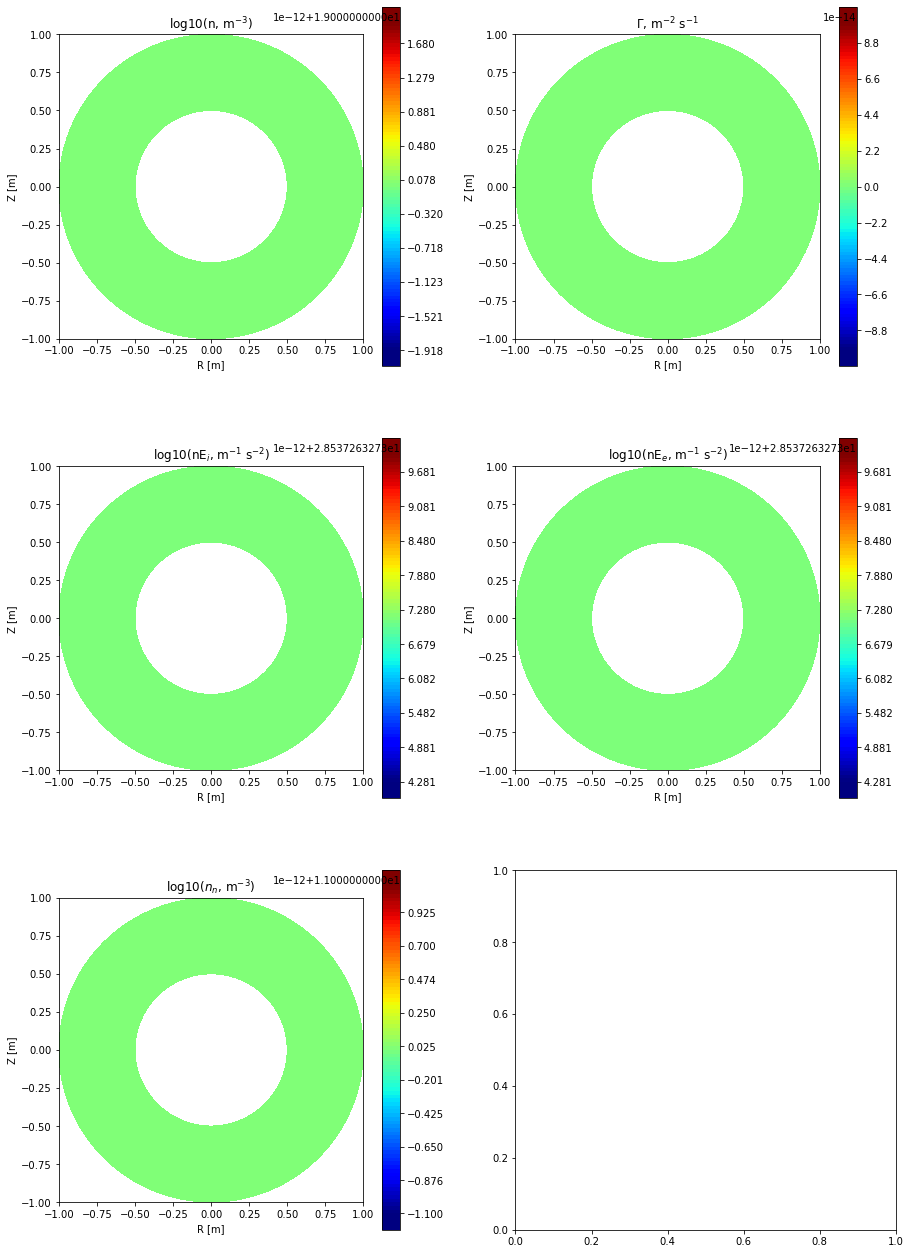

In [9]:
sol.plot_overview()
#you see that everything is constant

## after 10 small timesteps


In [10]:
# the final solution  always has no endings
solbase_after_time_init = 'Sol2D_CircLimAlign_Quads_Nel588_P6_DPe0.200E+02_DPai0.314E+06_DPae0.105E+08'

In [11]:
sol_after_time_init =load_from_file.load_HDG_solution_from_file(solpath,solbase_after_time_init,meshpath,meshbase,n_partitions)

Now the profiles are slightly evolved

Comibining first simple solution full
Comibining first solution full


(<Figure size 1080x1620 with 11 Axes>,
 array([[<AxesSubplot:title={'center':'log10(n, m$^{-3}$)'}, xlabel='R [m]', ylabel='Z [m]'>,
         <AxesSubplot:title={'center':'$\\Gamma$, m$^{-2}$ s$^{-1}$'}, xlabel='R [m]', ylabel='Z [m]'>],
        [<AxesSubplot:title={'center':'log10(nE$_i$, m$^{-1}$ s$^{-2}$)'}, xlabel='R [m]', ylabel='Z [m]'>,
         <AxesSubplot:title={'center':'log10(nE$_e$, m$^{-1}$ s$^{-2}$)'}, xlabel='R [m]', ylabel='Z [m]'>],
        [<AxesSubplot:title={'center':'log10($n_n$, m$^{-3}$)'}, xlabel='R [m]', ylabel='Z [m]'>,
         <AxesSubplot:>]], dtype=object),
 array([[ 1.00000001e+19,  2.28573983e+14,  3.44558742e+28,
          3.44558710e+28,  1.00008752e+11],
        [ 1.00000001e+19,  7.32982857e+14,  3.44558746e+28,
          3.44558721e+28,  9.99920616e+10],
        [ 9.99999995e+18,  2.46639258e+14,  3.44558744e+28,
          3.44558728e+28,  9.99956516e+10],
        ...,
        [ 8.55075667e+18, -2.49471747e+23,  8.53000755e+27,
          6.56742385

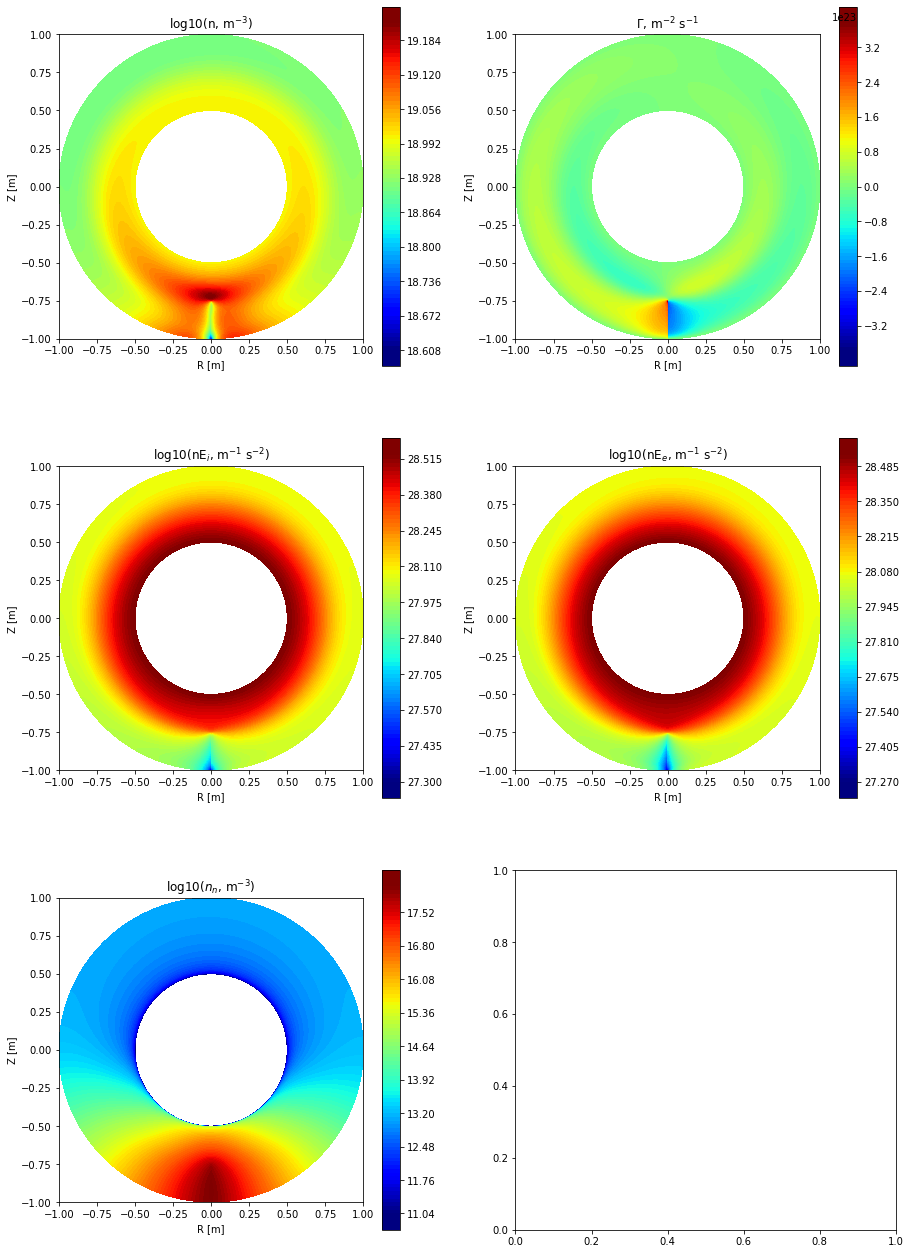

In [12]:
sol_after_time_init.plot_overview()

And you can also compare two solutions

(<Figure size 1080x1620 with 11 Axes>,
 array([[<AxesSubplot:title={'center':'n, m$^{-3}$'}, xlabel='R [m]', ylabel='Z [m]'>,
         <AxesSubplot:title={'center':'$\\Gamma$, m$^{-2}$ s$^{-1}$'}, xlabel='R [m]', ylabel='Z [m]'>],
        [<AxesSubplot:title={'center':'nE$_i$, m$^{-1}$ s$^{-2}$'}, xlabel='R [m]', ylabel='Z [m]'>,
         <AxesSubplot:title={'center':'nE$_e$, m$^{-1}$ s$^{-2}$'}, xlabel='R [m]', ylabel='Z [m]'>],
        [<AxesSubplot:title={'center':'$n_n$, m$^{-3}$'}, xlabel='R [m]', ylabel='Z [m]'>,
         <AxesSubplot:>]], dtype=object),
 array([[ 8.52074855e+10,  2.28573983e+14, -4.88863307e+19,
         -3.19380050e+21,  8.75216903e+06],
        [ 9.61119517e+10,  7.32982857e+14,  3.45438518e+20,
         -2.16903262e+21, -7.93842588e+06],
        [-4.56885929e+10,  2.46639258e+14,  2.00877712e+20,
         -1.47005911e+21, -4.34836214e+06],
        ...,
        [-1.44924333e+18, -2.49471747e+23, -2.59258667e+28,
         -2.78884504e+28,  1.00424251e+18],
    

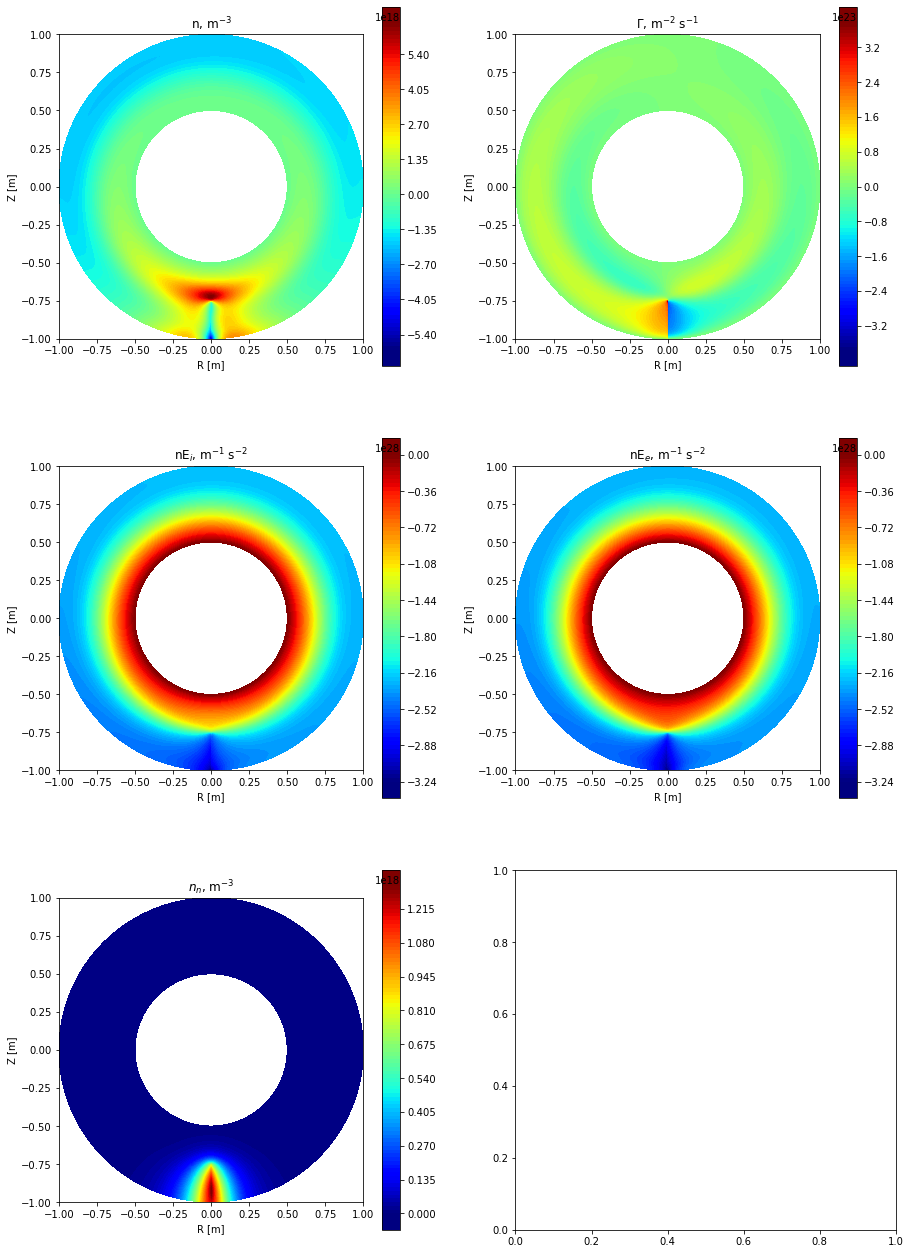

In [13]:
sol_after_time_init.plot_overview_difference(sol)

## Diffred


After these small timesteps has been done, we can start to find steady state solutions for consequently reduced diffsions


To do so we change some parameters in param file:
* psdtime = .true. this flag is actually responsible for reducing $D_0$ to diffred $\times D_0$ 
* diffred is also specified in param file, I set it to 0.6, so we will obtain solutions for $D_0 = $ 20, 12, 7.2, ... m^2/s
* dt0=3.e9 (this is essentially steady state)
* nrp = 40 max number of Newton-Raphson iterations the code will do if the convergence criterion (tNR, which is set to 1e-4 here) is not satisfied. If the error is lower, the code will consider that it found the solution and will reduce the diffusion
* nts = 30, in this mode it means that the code will try to reduce diffusion 30 times
* do not forget to change save_folder

we now add as a second parameter to run the code the path to the solution of first 10 timesteps:
> ./MHDG-NGammaTiTeNeutral-serial-2D ./Meshes/CircLimAlign_Quads_Nel588_P6 path_to_folder/Sol2D_CircLimAlign_Quads_Nel588_P6_DPe0.200E+02_DPai0.314E+06_DPae0.105E+08

And the code will use this provided solution as initial guess now

In [17]:
#solution path and name base
solpath = 'data/solutions/demo_circular_neutrals_only/diffred/'
# the initial solution from which you start your simulations always has ending _0000
solbase = 'Sol2D_CircLimAlign_Quads_Nel588_P6_DPe0.200E+02_DPai0.314E+06_DPae0.105E+08_0000'

In [18]:
sol_diffred_init = load_from_file.load_HDG_solution_from_file(solpath,solbase,meshpath,meshbase,n_partitions)

Comibining first simple solution full
Comibining first solution full


(<Figure size 1080x1620 with 11 Axes>,
 array([[<AxesSubplot:title={'center':'log10(n, m$^{-3}$)'}, xlabel='R [m]', ylabel='Z [m]'>,
         <AxesSubplot:title={'center':'$\\Gamma$, m$^{-2}$ s$^{-1}$'}, xlabel='R [m]', ylabel='Z [m]'>],
        [<AxesSubplot:title={'center':'log10(nE$_i$, m$^{-1}$ s$^{-2}$)'}, xlabel='R [m]', ylabel='Z [m]'>,
         <AxesSubplot:title={'center':'log10(nE$_e$, m$^{-1}$ s$^{-2}$)'}, xlabel='R [m]', ylabel='Z [m]'>],
        [<AxesSubplot:title={'center':'log10($n_n$, m$^{-3}$)'}, xlabel='R [m]', ylabel='Z [m]'>,
         <AxesSubplot:>]], dtype=object),
 array([[ 1.00000001e+19,  2.28573983e+14,  3.44558742e+28,
          3.44558710e+28,  1.00008752e+11],
        [ 1.00000001e+19,  7.32982857e+14,  3.44558746e+28,
          3.44558721e+28,  9.99920616e+10],
        [ 9.99999995e+18,  2.46639258e+14,  3.44558744e+28,
          3.44558728e+28,  9.99956516e+10],
        ...,
        [ 8.55075667e+18, -2.49471747e+23,  8.53000755e+27,
          6.56742385

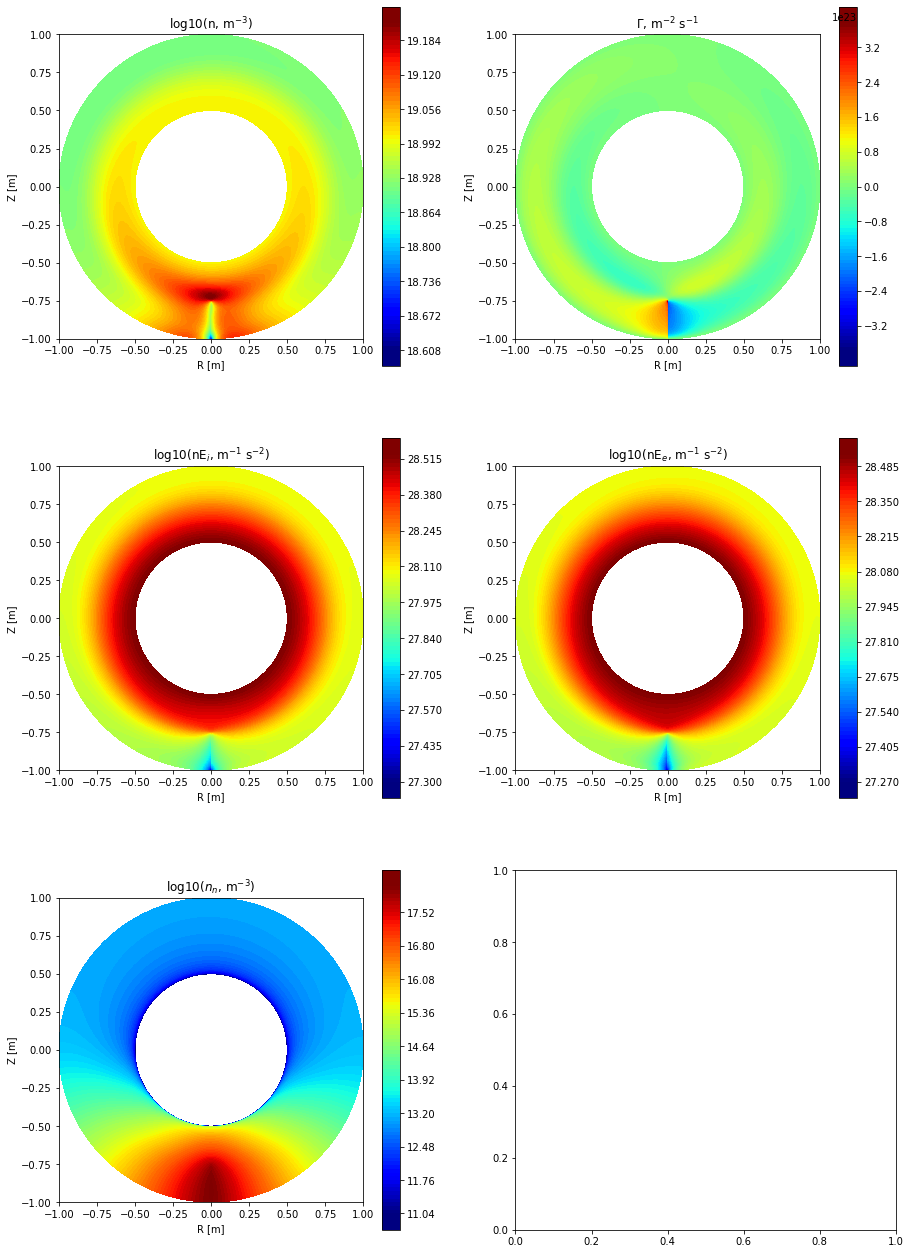

In [19]:
sol_diffred_init.plot_overview()

(<Figure size 1080x1620 with 11 Axes>,
 array([[<AxesSubplot:title={'center':'n, m$^{-3}$'}, xlabel='R [m]', ylabel='Z [m]'>,
         <AxesSubplot:title={'center':'$\\Gamma$, m$^{-2}$ s$^{-1}$'}, xlabel='R [m]', ylabel='Z [m]'>],
        [<AxesSubplot:title={'center':'nE$_i$, m$^{-1}$ s$^{-2}$'}, xlabel='R [m]', ylabel='Z [m]'>,
         <AxesSubplot:title={'center':'nE$_e$, m$^{-1}$ s$^{-2}$'}, xlabel='R [m]', ylabel='Z [m]'>],
        [<AxesSubplot:title={'center':'$n_n$, m$^{-3}$'}, xlabel='R [m]', ylabel='Z [m]'>,
         <AxesSubplot:>]], dtype=object),
 array([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]))

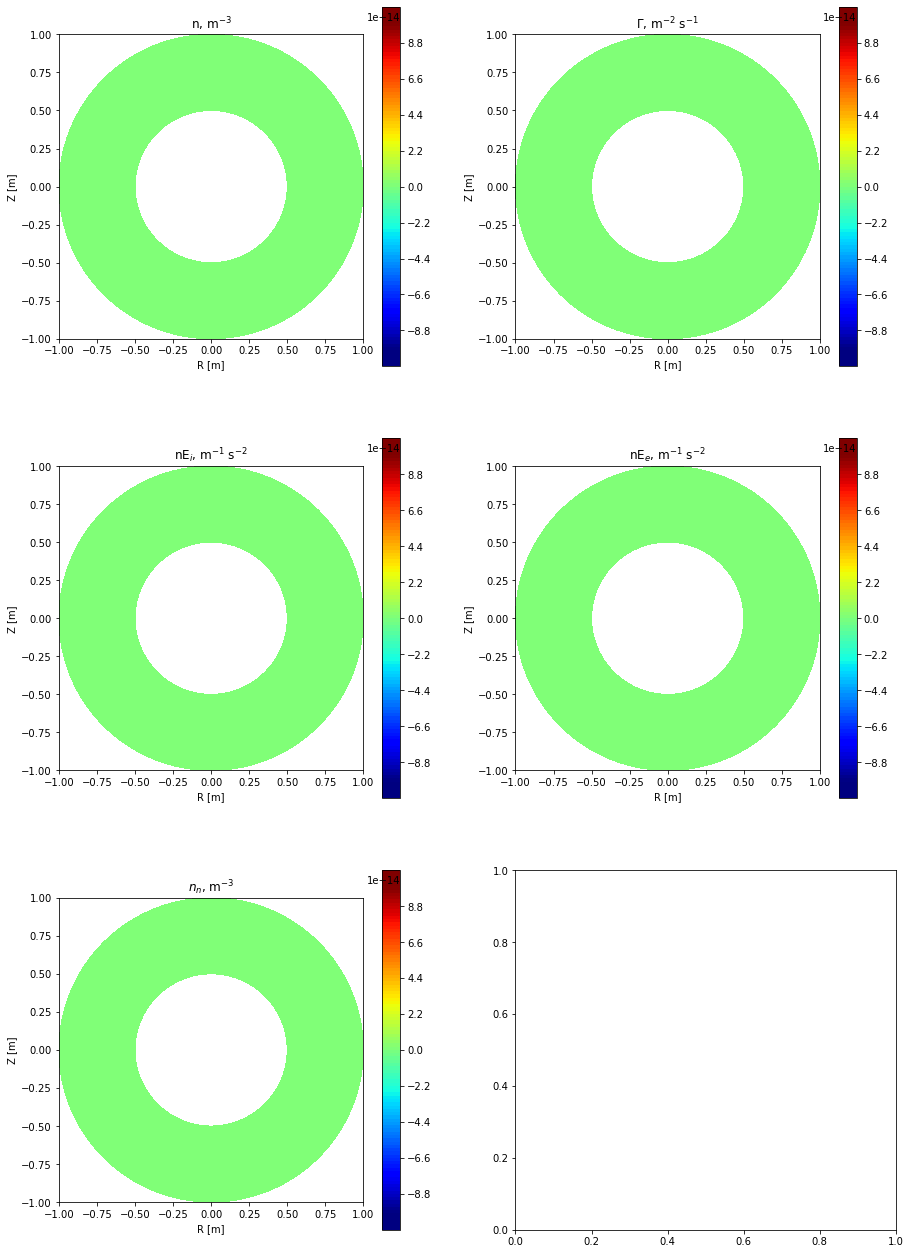

In [20]:
#solutions are equal
sol_diffred_init.plot_overview_difference(sol_after_time_init)

## and then it converges for $D_0$ = 20 m $^2$/s

In [32]:
solbase = 'Sol2D_CircLimAlign_Quads_Nel588_P6_DPe0.200E+02_DPai0.314E+06_DPae0.105E+08'
sol_diffred_20_steady = load_from_file.load_HDG_solution_from_file(solpath,solbase,meshpath,meshbase,n_partitions)

Comibining first simple solution full
Comibining first solution full


(<Figure size 1080x1620 with 11 Axes>,
 array([[<AxesSubplot:title={'center':'log10(n, m$^{-3}$)'}, xlabel='R [m]', ylabel='Z [m]'>,
         <AxesSubplot:title={'center':'$\\Gamma$, m$^{-2}$ s$^{-1}$'}, xlabel='R [m]', ylabel='Z [m]'>],
        [<AxesSubplot:title={'center':'log10(nE$_i$, m$^{-1}$ s$^{-2}$)'}, xlabel='R [m]', ylabel='Z [m]'>,
         <AxesSubplot:title={'center':'log10(nE$_e$, m$^{-1}$ s$^{-2}$)'}, xlabel='R [m]', ylabel='Z [m]'>],
        [<AxesSubplot:title={'center':'log10($n_n$, m$^{-3}$)'}, xlabel='R [m]', ylabel='Z [m]'>,
         <AxesSubplot:>]], dtype=object),
 array([[ 1.00000000e+19, -6.87760762e+14,  3.44558741e+28,
          3.44558685e+28,  9.99850813e+10],
        [ 9.99999971e+18, -1.33780024e+15,  3.44558742e+28,
          3.44558702e+28,  1.00000676e+11],
        [ 1.00000001e+19, -1.76434490e+15,  3.44558747e+28,
          3.44558735e+28,  1.00001523e+11],
        ...,
        [ 4.53399695e+18, -1.34615009e+23,  4.72502663e+27,
          3.33640587

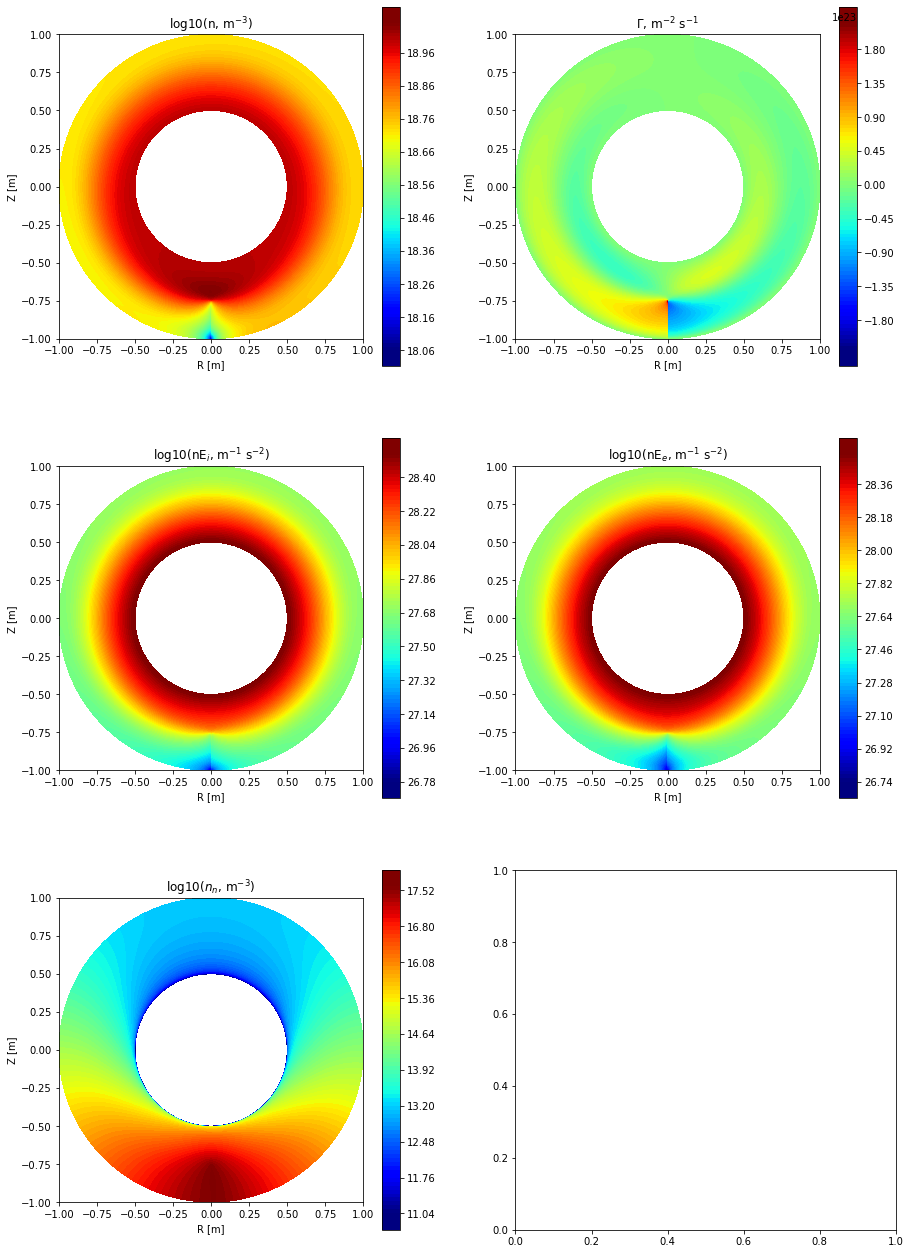

In [33]:
sol_diffred_20_steady.plot_overview()
# the turbulence now is fully ballooned as expected, the concentrations of neutrals is higher at the limiter, where recycling happens

(<Figure size 1080x1620 with 11 Axes>,
 array([[<AxesSubplot:title={'center':'n, m$^{-3}$'}, xlabel='R [m]', ylabel='Z [m]'>,
         <AxesSubplot:title={'center':'$\\Gamma$, m$^{-2}$ s$^{-1}$'}, xlabel='R [m]', ylabel='Z [m]'>],
        [<AxesSubplot:title={'center':'nE$_i$, m$^{-1}$ s$^{-2}$'}, xlabel='R [m]', ylabel='Z [m]'>,
         <AxesSubplot:title={'center':'nE$_e$, m$^{-1}$ s$^{-2}$'}, xlabel='R [m]', ylabel='Z [m]'>],
        [<AxesSubplot:title={'center':'$n_n$, m$^{-3}$'}, xlabel='R [m]', ylabel='Z [m]'>,
         <AxesSubplot:>]], dtype=object),
 array([[-3.69762576e+10, -9.16334745e+14, -2.92803854e+19,
         -2.55966514e+21, -2.36708371e+07],
        [-3.84296454e+11, -2.07078310e+15, -3.24408276e+20,
         -1.80795854e+21,  8.61456907e+06],
        [ 1.79414990e+11, -2.01098416e+15,  3.12225733e+20,
          7.21963281e+20,  5.87169443e+06],
        ...,
        [-4.01675972e+18,  1.14856738e+23, -3.80498092e+27,
         -3.23101798e+27, -5.82612335e+17],
    

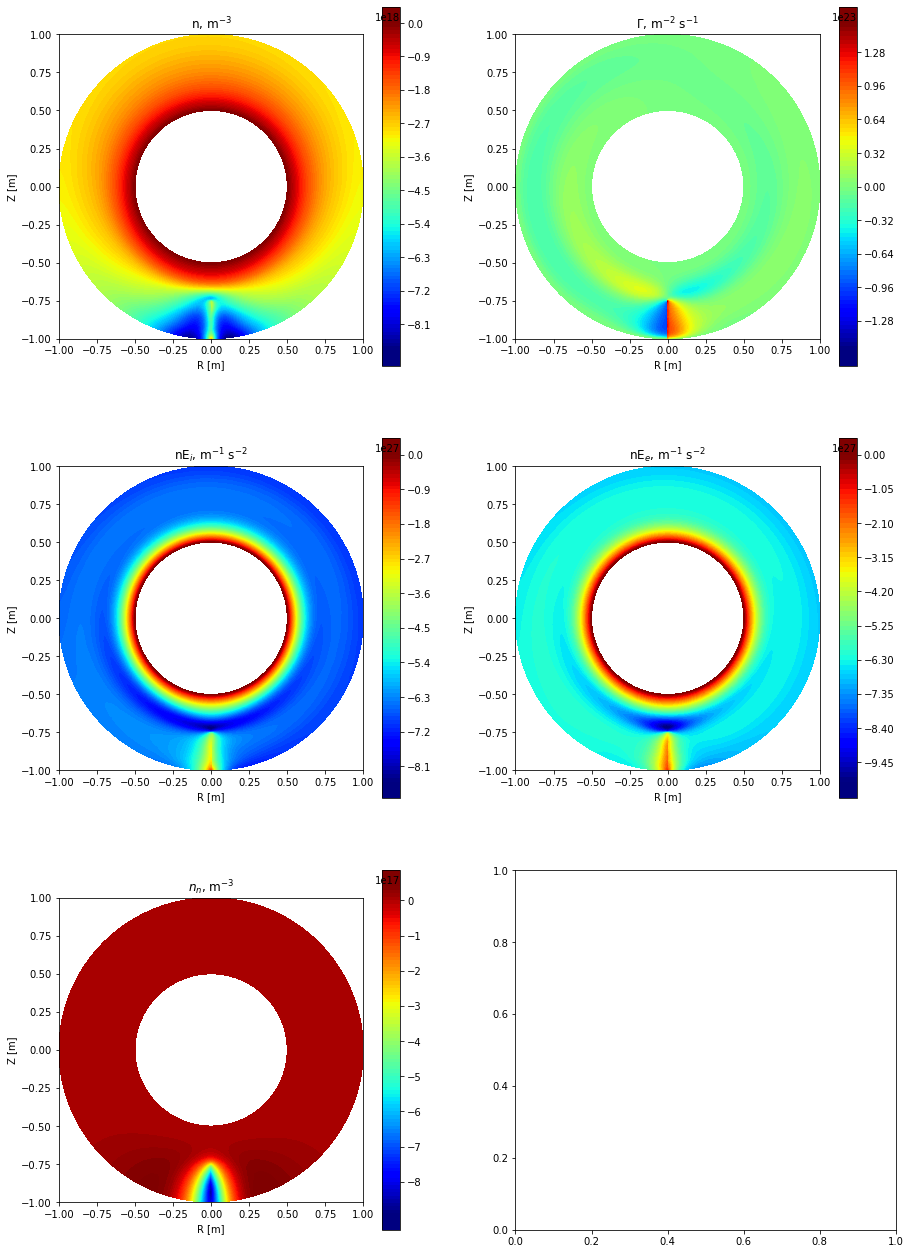

In [34]:
sol_diffred_20_steady.plot_overview_difference(sol_diffred_init)

## then the code reduces both $D_0$  by 0.6, having now 12 $m^2/s$

In [35]:
solbase = 'Sol2D_CircLimAlign_Quads_Nel588_P6_DPe0.120E+02_DPai0.314E+06_DPae0.105E+08'
sol_diffred_12_steady = load_from_file.load_HDG_solution_from_file(solpath,solbase,meshpath,meshbase,n_partitions)

Comibining first simple solution full
Comibining first solution full


(<Figure size 1080x1620 with 11 Axes>,
 array([[<AxesSubplot:title={'center':'log10(n, m$^{-3}$)'}, xlabel='R [m]', ylabel='Z [m]'>,
         <AxesSubplot:title={'center':'$\\Gamma$, m$^{-2}$ s$^{-1}$'}, xlabel='R [m]', ylabel='Z [m]'>],
        [<AxesSubplot:title={'center':'log10(nE$_i$, m$^{-1}$ s$^{-2}$)'}, xlabel='R [m]', ylabel='Z [m]'>,
         <AxesSubplot:title={'center':'log10(nE$_e$, m$^{-1}$ s$^{-2}$)'}, xlabel='R [m]', ylabel='Z [m]'>],
        [<AxesSubplot:title={'center':'log10($n_n$, m$^{-3}$)'}, xlabel='R [m]', ylabel='Z [m]'>,
         <AxesSubplot:>]], dtype=object),
 array([[ 1.00000000e+19, -1.24922102e+15,  3.44558740e+28,
          3.44558679e+28,  9.99894999e+10],
        [ 1.00000001e+19, -2.00532135e+15,  3.44558745e+28,
          3.44558704e+28,  1.00002221e+11],
        [ 9.99999998e+18, -2.10490491e+15,  3.44558745e+28,
          3.44558727e+28,  1.00002875e+11],
        ...,
        [ 3.07138422e+18, -9.39234045e+22,  3.42677225e+27,
          2.35741423

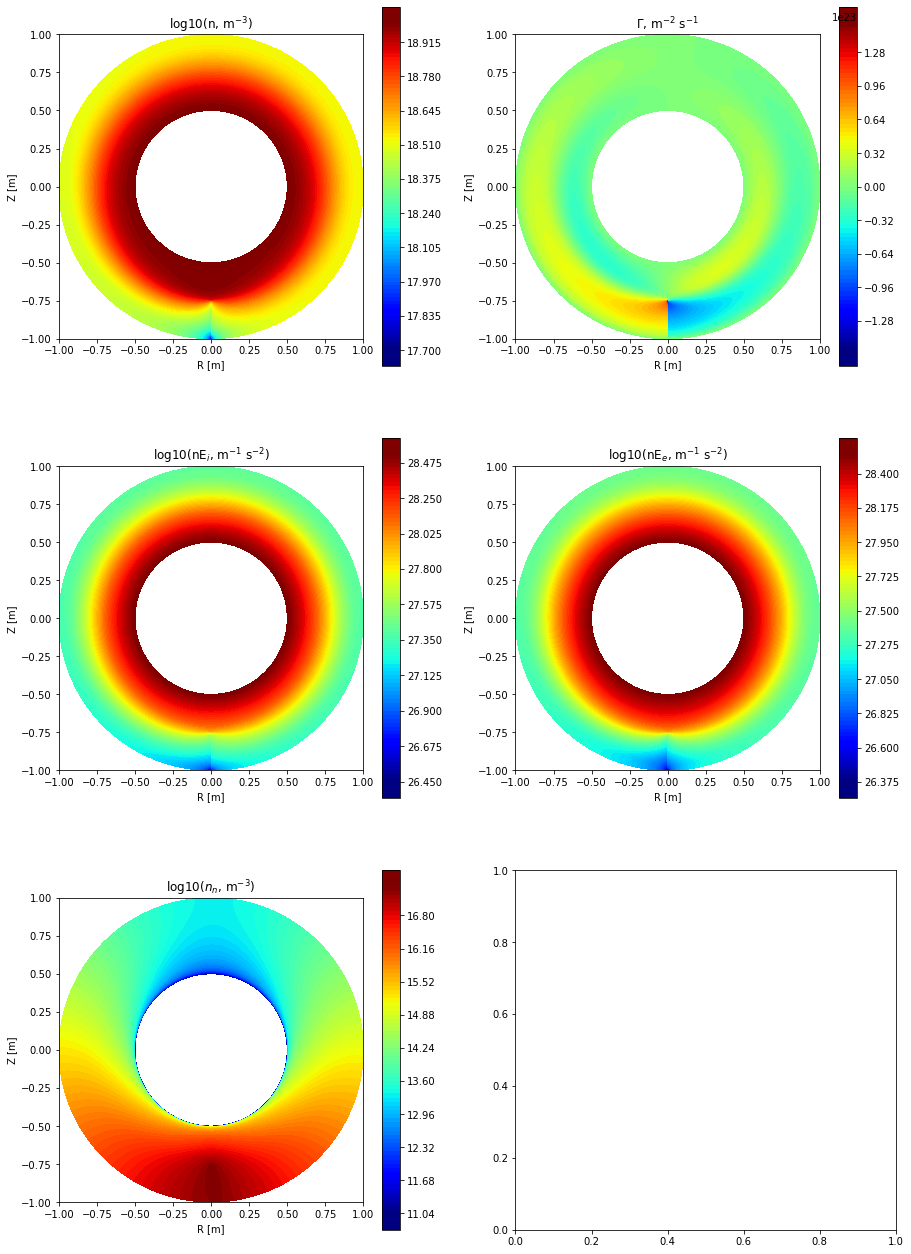

In [36]:
sol_diffred_12_steady.plot_overview()

## And it continues to reduce by 0.6 each time, when it reached $D_0$=0.202 $m^2$/s

In [37]:
solbase = 'Sol2D_CircLimAlign_Quads_Nel588_P6_DPe0.202E+00_DPai0.314E+06_DPae0.105E+08'
sol_diffred_0_202_steady = load_from_file.load_HDG_solution_from_file(solpath,solbase,meshpath,meshbase,n_partitions)

Comibining first simple solution full
Comibining first solution full


(<Figure size 1080x1620 with 11 Axes>,
 array([[<AxesSubplot:title={'center':'log10(n, m$^{-3}$)'}, xlabel='R [m]', ylabel='Z [m]'>,
         <AxesSubplot:title={'center':'$\\Gamma$, m$^{-2}$ s$^{-1}$'}, xlabel='R [m]', ylabel='Z [m]'>],
        [<AxesSubplot:title={'center':'log10(nE$_i$, m$^{-1}$ s$^{-2}$)'}, xlabel='R [m]', ylabel='Z [m]'>,
         <AxesSubplot:title={'center':'log10(nE$_e$, m$^{-1}$ s$^{-2}$)'}, xlabel='R [m]', ylabel='Z [m]'>],
        [<AxesSubplot:title={'center':'log10($n_n$, m$^{-3}$)'}, xlabel='R [m]', ylabel='Z [m]'>,
         <AxesSubplot:>]], dtype=object),
 array([[ 1.00000018e+19, -1.23793007e+17,  3.44558791e+28,
          3.44558777e+28,  1.00005958e+11],
        [ 1.00000003e+19, -1.16666549e+17,  3.44558741e+28,
          3.44558749e+28,  1.00003419e+11],
        [ 1.00000010e+19, -1.38126057e+17,  3.44558758e+28,
          3.44558782e+28,  1.00002263e+11],
        ...,
        [ 5.92529616e+16, -1.36672581e+21,  4.79597491e+25,
          1.49408034

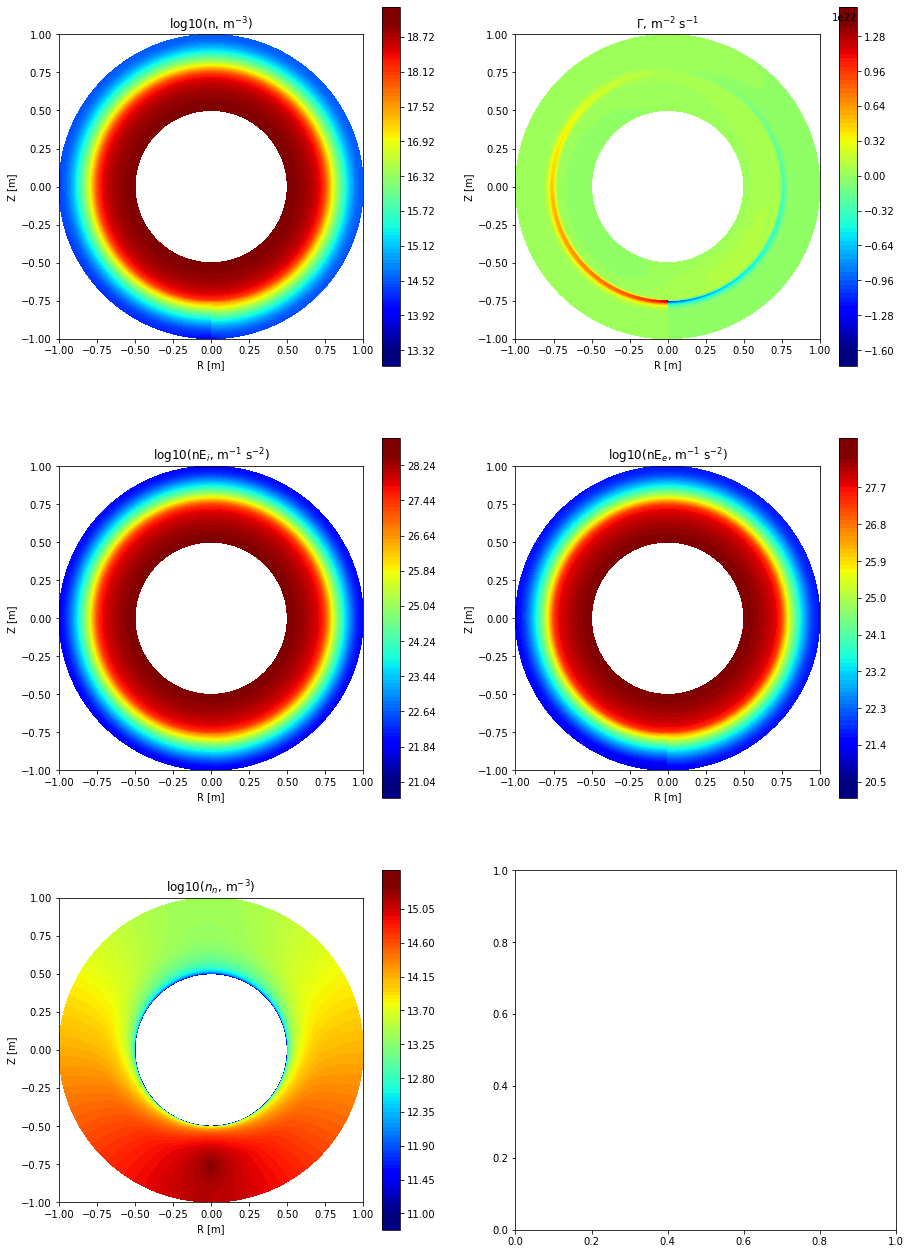

In [38]:
sol_diffred_0_202_steady.plot_overview()
# now the plasma profiles are sharper due to lower diffusion
# also due to higher gradients, there is more turbulent energy

# Now you can try to reach lower minimal diffusion
Start with changing diffred to 0.8




diff_n=diff_u=diff_e=diff_ee=0.16

start with solution Sol2D_CircLimAlign_Quads_Nel588_P6_DPe0.202E+00_DPai0.314E+06_DPae0.105E+08 (which is for $D_0$=0.202)